#### Notebook Objective<a id='Notebook Objective'></a>
In this notebook we are looking at our data in a general way to get a feel for what we 
have to work with. We'll be looking for duplicate values, outliers, non-sensical data etc. 

We'll be fixing data quality issues we find and doing some high level exploration of the 
data as well.



#### Imports<a id='Imports'></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import os



#### Load Data<a id='Load Data'></a>

In [2]:
happy_data = pd.read_csv('../data/raw/World Happiness Report.csv')

In [3]:
happy_data.head(20)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179


This format may be an issue - we have multiple rows for each country with one row for each
year of data for that country. This isn't a tidy format. 

We'll need to change this so that each country is a single row
Each datapoint for each year will have it's own column named for that year and the data point

In [4]:
print(len(happy_data))
happy_data.info()

2199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   

The data set looks pretty complete over all. Our target feature is 'Life Ladder' and we 
have that feature for every record in the data set. All the data types look correct for 
the various features. 

There are a lot of columns with missing values, but it's a small number of missing values
for most of them - we should be able to explore those further and fill in some or all of 
that data. 

The column with the most missing values is 'Confidence in National Government'
We'll have to look at the patterns there to see where those missing values are and how to
account for them. 

#### Categorical Features<a id='Categorical Features'></a>

In [5]:
#Visual check for misspesslings/ duplicates of countries using unique values
happy_data['Country Name'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

In [6]:
#Visual check for mispellings/ duplicates of regional indicators
happy_data['Regional Indicator'].unique()


array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [7]:
#Check for out of range years - years should range from 2005 to 2022
#Check if we have the same amount of data for each year

years = happy_data['Year'].sort_values()
years.value_counts(sort = False)

Year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    141
2013    136
2014    144
2015    142
2016    141
2017    147
2018    141
2019    143
2020    116
2021    122
2022    114
Name: count, dtype: int64

We don't seem to have any out of range years.

There is considerably less data from the earlier years in the data set. Not a problem now,
but something to keep in mind should the year become important in future analysis.

In [8]:
#Check for repeats of country and year 
#There should be only one record for each country and each year. 

columns = ['Country Name', 'Year']
duplicates = happy_data.duplicated(subset = columns, keep = False)

happy_data[duplicates].sort_values(by = 'Country Name')


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government


There don't appear to be any duplicate records for country and year. 

#### Numercial Features and outliers<a id='Numerical Features and outliers'></a>

In [9]:
#Look for our of range values for life ladder and other variables

happy_data.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


All variables seem to be more or less in line with what's expected in terms of general range
There are some concerning outliers:
The minimum value for 'Healthy Life Expectancy At Birth' is 6.9
Minimum value for 'Positive Affect' is 0.17
Minimum value for confidence in National Government is 0.06
Max value for confidence in National Government is 0.99

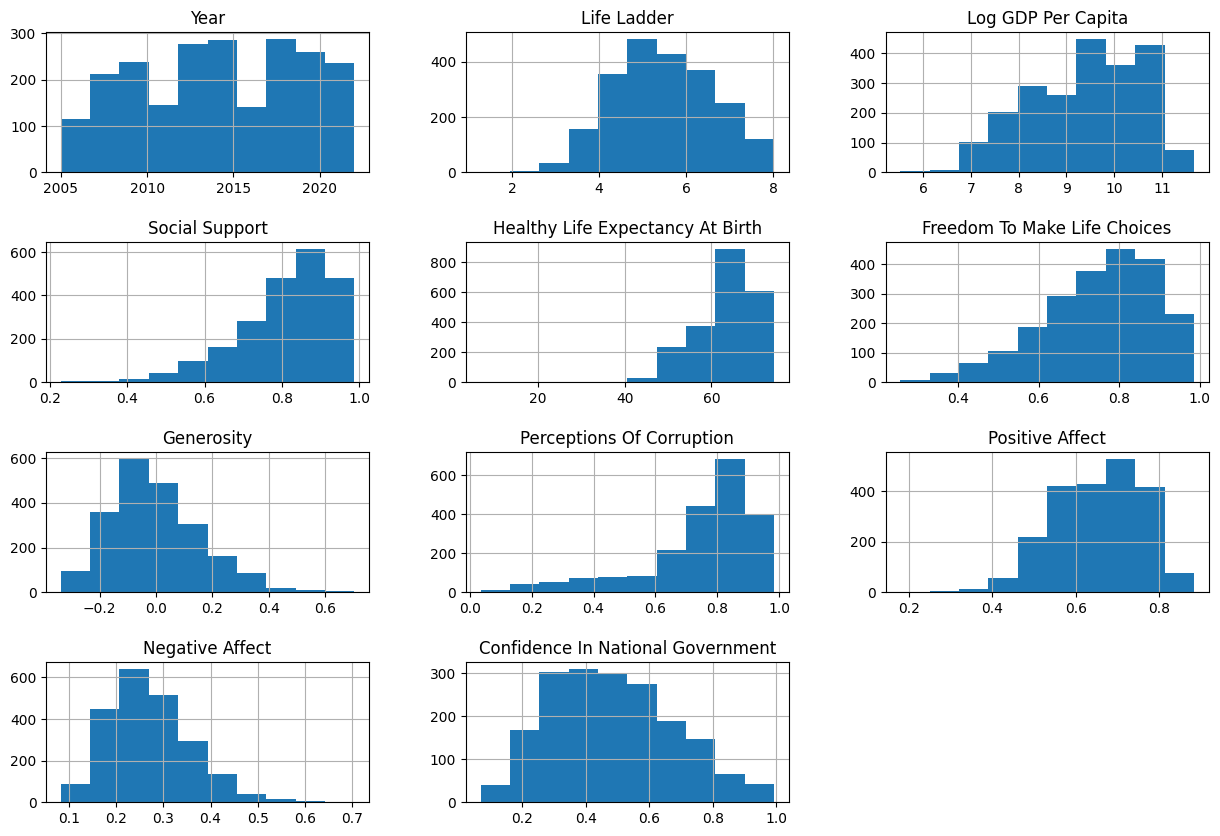

In [10]:
#Plot all of the numeric features to get a visual overview of any outliers. 

happy_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [11]:
#The minimum value for 'Healthy Life Expectancy At Birth' is 6.9
#Which country is that? 

low_life_expectancy = happy_data[happy_data['Healthy Life Expectancy At Birth'] < 40]
low_life_expectancy.head(20)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
766,Haiti,Latin America and Caribbean,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141,0.357021
767,Haiti,Latin America and Caribbean,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774,0.236633
768,Haiti,Latin America and Caribbean,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557,0.156371
769,Haiti,Latin America and Caribbean,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856,0.456668
770,Haiti,Latin America and Caribbean,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806,0.367327


In [12]:
#Minimum value for 'Positive Affect' is 0.17

min_positive_aff = happy_data[happy_data['Positive Affect'] < 0.4]
low_life_expectancy.head(20)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
766,Haiti,Latin America and Caribbean,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141,0.357021
767,Haiti,Latin America and Caribbean,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774,0.236633
768,Haiti,Latin America and Caribbean,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557,0.156371
769,Haiti,Latin America and Caribbean,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856,0.456668
770,Haiti,Latin America and Caribbean,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806,0.367327


Either the data here are wrong or something terrible was going on in Haiti between 2006 and 2012.
A google search reveals multiple tropical storms and hurricane hits, as well as a major earthqauke in
2010 that killed over 100,000 people. 

The Healthy Life Expectancy at birth number for 2006 doesn't seem credible as a real world number. 
2008 doesn't seem credible either - both will likelt need to be dropped as outliers (see below)


In [13]:
#Minimum value for Confidence In National Government is 0.06

min_confidence = happy_data[happy_data['Confidence In National Government'] <= 0.1]
min_confidence.sort_values(by ='Confidence In National Government')

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
1567,Poland,Central and Eastern Europe,2005,5.587209,9.843980,0.921528,66.199997,0.782473,NaN,0.982931,0.610626,0.282439,0.068769
2023,Ukraine,Commonwealth of Independent States,2007,5.252182,9.498955,0.820094,61.240002,0.493922,-0.246704,0.967940,0.558920,0.207652,0.078787
2034,Ukraine,Commonwealth of Independent States,2018,4.661909,9.420352,0.900937,64.175003,0.663055,-0.077508,0.942961,0.550486,0.221851,0.079710
1288,Moldova,Commonwealth of Independent States,2016,5.577784,9.300052,0.837321,63.299999,0.557369,-0.050467,0.969483,0.586274,0.274551,0.084061
2031,Ukraine,Commonwealth of Independent States,2015,3.964543,9.325108,0.909440,63.799999,0.430592,-0.036332,0.952473,0.531036,0.241076,0.084304
2025,Ukraine,Commonwealth of Independent States,2009,5.165639,9.366870,0.845293,61.880001,0.460348,-0.246959,0.962244,0.544606,0.189014,0.086691
1606,Romania,Central and Eastern Europe,2010,4.909166,9.924231,0.689066,65.400002,0.565537,-0.088909,0.973686,0.539418,0.344478,0.093853
221,Bosnia and Herzegovina,Central and Eastern Europe,2014,5.248954,9.373148,0.787652,67.000000,0.411937,0.231438,0.976340,0.490835,0.262175,0.095099
1088,Latvia,Central and Eastern Europe,2009,4.668911,9.985267,0.806939,64.000000,0.437065,-0.184680,0.942090,0.536985,0.242197,0.099944


In [14]:
#Max value for confidence in National Government is 0.99

max_confidence = happy_data[happy_data['Confidence In National Government'] > 0.8]
max_confidence.sort_values(by  = 'Confidence In National Government')

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
980,Jordan,Middle East and North Africa,2005,6.294660,9.282825,0.920013,65.800003,NaN,NaN,0.669727,0.629833,0.239560,0.800150
858,Indonesia,Southeast Asia,2016,5.136325,9.260966,0.791831,62.424999,0.829942,0.496852,0.889677,0.747754,0.341574,0.800881
1563,Philippines,Southeast Asia,2018,5.869173,9.031899,0.845803,61.974998,0.917808,-0.109501,0.726483,0.756184,0.393481,0.802007
1565,Philippines,Southeast Asia,2020,5.079585,8.958445,0.781140,62.025002,0.932042,-0.110944,0.744284,0.792736,0.326889,0.802727
237,Botswana,Sub-Saharan Africa,2016,3.498937,9.573143,0.768303,53.075001,0.851695,-0.243528,0.729172,0.657055,0.251837,0.803131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,Rwanda,Sub-Saharan Africa,2017,3.108374,7.567849,0.516550,59.549999,0.908115,0.051284,0.213757,0.724040,0.358310,0.981398
1078,Laos,Southeast Asia,2011,4.703750,8.537691,0.690878,57.779999,0.881634,0.456966,0.587322,0.746240,0.225278,0.981804
1647,Rwanda,Sub-Saharan Africa,2019,3.268152,7.692297,0.489458,60.200001,0.868999,0.063509,0.167971,0.716731,0.417668,0.985845
1646,Rwanda,Sub-Saharan Africa,2018,3.561047,7.625810,0.616173,59.875000,0.924232,0.056681,0.163810,0.765132,0.308199,0.988120


These values seem suspicious - a quick google search of Rwanda in 2016 - the year with the
highest confidence score, shows that the country had seious issues and a repressive government
It's not clear how to quantify the reliablity of data gathered in an environment like this. 

The other countries on the very high end of the list seem to have similar issues.

#### Null Values<a id='Null Values'></a>

In [15]:
missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))

,count,%
Confidence In National Government,361,16.416553
Perceptions Of Corruption,116,5.275125
Regional Indicator,112,5.093224
Generosity,73,3.319691
Healthy Life Expectancy At Birth,54,2.455662
Freedom To Make Life Choices,33,1.500682
Positive Affect,24,1.091405
Log GDP Per Capita,20,0.909504
Negative Affect,16,0.727603
Social Support,13,0.591178


Each of the above columns null values will need to be handled separately

#### Null Values - Regional Indicator<a id='Null Values - Regional Indicator'></a>

In [16]:
#Find countries without Regional Indicators and add regional indicators based on neighboring Countries. 

reg_missing = happy_data[happy_data['Regional Indicator'].isnull()]
names = reg_missing['Country Name'].unique()


#Determined appropriate 'Regional Indicator' values based on known values for neighboring countries

region_dict = {
    'Angola':'Sub-Saharan Africa',
    'Bhutan':'South Asia',
    'Belize':'Latin America and Caribbean',
    'Central African Republic':'Sub-Saharan Africa',
    'Congo (Kinshasa)':'Sub-Saharan Africa',
    'Cuba':'Latin America and Caribbean',
    'Czechia':'Central and Eastern Europe',
    'Djibouti':'Sub-Saharan Africa',
    'Eswatini':'Sub-Saharan Africa',
    'Guyana':'Latin America and Caribbean',
    'Oman':'Middle East and North Africa',
    'Qatar':'Middle East and North Africa',
    'Somalia':'Sub-Saharan Africa',
    'Somaliland region':'Sub-Saharan Africa',
    'South Sudan':'Sub-Saharan Africa',
    'State of Palestine':'Middle East and North Africa',
    'Sudan':'Sub-Saharan Africa',
    'Suriname':'Latin America and Caribbean',
    'Syria':'Middle East and North Africa',
    'Trinidad and Tobago':'Latin America and Caribbean',
    'Turkiye':'Middle East and North Africa',
}

#Loop through names list and assign appropriate region label
for name in names:
    happy_data.loc[happy_data['Country Name'] == name, 'Regional Indicator'] = region_dict[name]


#Check that all missing values in 'Regional Indicator' have been removed. 
missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))

,count,%
Confidence In National Government,361,16.416553
Perceptions Of Corruption,116,5.275125
Generosity,73,3.319691
Healthy Life Expectancy At Birth,54,2.455662
Freedom To Make Life Choices,33,1.500682
Positive Affect,24,1.091405
Log GDP Per Capita,20,0.909504
Negative Affect,16,0.727603
Social Support,13,0.591178
Country Name,0,0.000000


#### Null Values - Multiple Null Values <a id='Null Values - Multiple Null Values'></a>
Dropping all rows that have more than one null value present this is to remove the rows with multiple missing values

In [17]:
#Locate rows with missing multiple null values and drop them - this is done in place


#Check len of dateframe before dropping rows:
print('The df before dropping has ' + str(len(happy_data)) + ' rows')


#subsetting the columns where we know there are missing values
cols = ['Confidence In National Government','Perceptions Of Corruption','Generosity','Healthy Life Expectancy At Birth',
        'Freedom To Make Life Choices','Positive Affect','Log GDP Per Capita','Negative Affect']

happy_data.dropna(axis = 0, thresh = 7, subset = cols, inplace = True)
happy_data.reset_index(inplace = True, drop = True)



print('The df after dropping has ' + str(len(happy_data)) + ' rows')


missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))

The df before dropping has 2199 rows
The df after dropping has 2040 rows


,count,%
Confidence In National Government,224,10.980392
Healthy Life Expectancy At Birth,31,1.519608
Generosity,30,1.470588
Perceptions Of Corruption,13,0.637255
Positive Affect,5,0.245098
Social Support,2,0.098039
Negative Affect,1,0.049020
Country Name,0,0.000000
Regional Indicator,0,0.000000
Year,0,0.000000


#### Null Values - Confidence in National Government <a id=' - Confidence in National Government'></a>


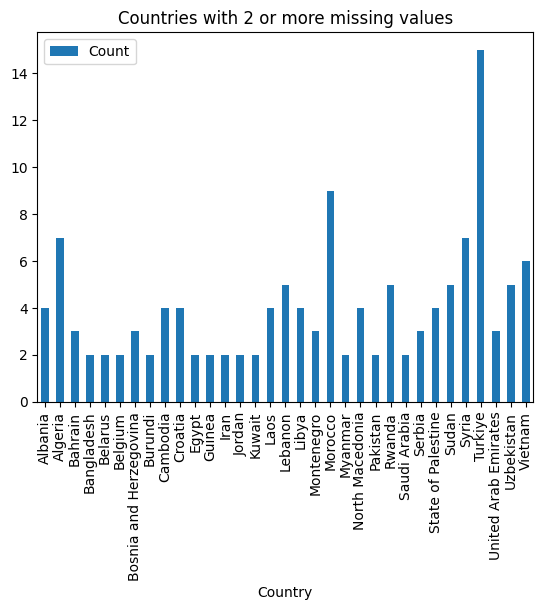

In [18]:
#Subset all countries with missing confidence data
missing_confidence = happy_data[happy_data['Confidence In National Government'].isnull()]

#make a list of the country names
country_list = missing_confidence['Country Name'].tolist()

#pass the list of country names to counter to get the number of occurances
count_dict = Counter(country_list)


#convert the counter object to a dataframe to try plotting the country name and count
country_name_count = pd.DataFrame.from_dict(count_dict, orient = 'index', columns = ['Count'])
country_name_count.reset_index(inplace = True, names = 'Country')



#There are 126 countries in the data frame with at least one missing Confidence value. 
#I tried plotting this and the plot was not readable - too many x-ticks


#Subsetting again to find countries missing 2 or more values
two_or_more_missing_values = country_name_count[country_name_count['Count']>=2]


two_or_more_missing_values.plot(x = 'Country', y = 'Count', kind = 'bar', 
                                title = 'Countries with 2 or more missing values',
                                rot = 90);




There are a couple countries that really stand out in terms of missing values. 
Turkiye seems to be missing almost all of the values
Further research indicates that these values are missing in some countires because the 
questions about government are not being asked as part of the survey in some cases. 

In [19]:
cols = two_or_more_missing_values[two_or_more_missing_values['Count']>= 6]['Country']

over_6_missing_values_data = happy_data[happy_data['Country Name'].isin(cols)]
over_6_missing_values_data.head(len(over_6_missing_values_data))

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
28,Algeria,Middle East and North Africa,2011,5.317194,9.315958,0.810234,65.599998,0.529561,-0.185084,0.637982,0.502736,0.254897,NaN
29,Algeria,Middle East and North Africa,2012,5.604596,9.329962,0.839397,65.699997,0.586663,-0.176571,0.690116,0.540059,0.229716,NaN
30,Algeria,Middle East and North Africa,2017,5.248912,9.376658,0.806754,66.199997,0.436670,-0.171471,0.699774,0.554529,0.288710,NaN
31,Algeria,Middle East and North Africa,2018,5.043086,9.369554,0.798651,66.300003,0.583381,-0.150559,0.758704,0.533725,0.292946,NaN
32,Algeria,Middle East and North Africa,2019,4.744627,9.361110,0.803259,66.400002,0.385083,0.000268,0.740609,0.544428,0.215198,NaN
33,Algeria,Middle East and North Africa,2020,5.437755,9.291438,0.867649,66.500000,0.573891,-0.121148,0.724264,0.524169,0.310630,NaN
34,Algeria,Middle East and North Africa,2021,5.217018,9.309262,0.840710,66.599998,0.558487,-0.113483,0.711900,0.498022,0.257779,NaN
1246,Morocco,Middle East and North Africa,2011,5.084973,8.710196,0.833385,62.660000,0.578931,-0.215434,0.875225,0.687322,0.187149,NaN
1247,Morocco,Middle East and North Africa,2012,4.969656,8.725994,0.675825,62.820000,0.756785,-0.184038,0.844935,0.640916,0.281336,0.525868
1248,Morocco,Middle East and North Africa,2013,5.142160,8.756593,0.597166,62.980000,0.571630,-0.207794,0.771112,0.707146,0.239409,0.383581


Examining the data for the countries missing 6 or more values above shows that most of them are partially or completely missing.
For some countries, like Vietnam below, it looks like the questions about government stopped being asked after a certain date.
We can impute values where only a couple are missing - but for countries with a lot of missing values there is not much to base
the imputation on. 

Because of this, we'll be dropping any country where the number of missing values is more than 3.
The remaining missing values will be imputed. 

#### Null Values - Confidence in National Government - Dropping Null Values <a id=' - Confidence in National Government - Dropping Null Values'></a>

The below drops 177 rows of data - all the countries where there were more than 3 missing values for 'Confidence In National Government'


In [20]:
#check len() of dataframe prior to drop 
print('The number of rows prior to dropping is ' + str(len(happy_data)))

#subset or dataframe of missing values to isolate the countries with more than 3 missing
countries_missing_3_plus = two_or_more_missing_values[two_or_more_missing_values['Count']> 3]['Country'].tolist()

#drop all rows where the country name is in the list of countries with 3 or more missing values for 'Confidence In National Government'
happy_data.drop(happy_data[happy_data['Country Name'].isin(countries_missing_3_plus)].index, inplace = True)

#check len() of dataframe after drop
print('The number of rows after to dropping is ' + str(len(happy_data)))

#resetting dataframe index after drop
happy_data.reset_index(drop = True, inplace=True)

The number of rows prior to dropping is 2040
The number of rows after to dropping is 1863


#### Imputing remaining missing values <a id=' - Imputing remaining missing values'></a>

In [21]:
missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))



,count,%
Confidence In National Government,132,7.085346
Healthy Life Expectancy At Birth,31,1.663983
Generosity,29,1.556629
Perceptions Of Corruption,11,0.590446
Positive Affect,3,0.161031
Social Support,2,0.107354
Negative Affect,1,0.053677
Country Name,0,0.000000
Regional Indicator,0,0.000000
Year,0,0.000000


We can see from the above that we've gotten rid of a lot of the missing values by by dropping
records in the cells above. The remaining missing values should be isolated missing values. 

To fill these values, we will:
- Loop through the columns with missing values 
- Determine the country for each missing value 
- Calculate the mean value based on the country and column
- Impute that mean value into the missing value

In [22]:

happy_data.head(30)

countries = set(happy_data['Country Name'])
remaining_missing_value_cols = ['Confidence In National Government','Healthy Life Expectancy At Birth','Generosity','Perceptions Of Corruption','Positive Affect','Social Support','Negative Affect']


def impute_with_mean(dataframe,record_col, records,missing_value_cols):
        '''
        This function takes in a list of labels for records in a dataframe and a list of
        columns that have missing values. It loops through the labels, subsets the data frame
        by those labels, and checks if there there missing values in each of the columns
        If a missing value is found, it is filled in with a the mean value calulated from the 
        values in the subset column. 


        Precondition: dataframe is a non-empty pandas dataframe
        Precondition: record_col is a string, it's the column name that the records belong to
        Precondition: records is a list of values representing records in dataframe
        Precondition: missing_value_cols is a list of strings representing column names that exist in dataframe
        '''

        for record in records:
                subset = dataframe[dataframe[record_col]== record]
                for column in missing_value_cols:
                        if len(subset[subset[column].isnull()]) > 0:
                                mean = np.mean(subset[column])
                                subset_index = subset.index
                               
                                for index in subset_index:
                                        if pd.isna(happy_data.iloc[[index],happy_data.columns.get_loc(column)]).any():
                                                happy_data.iloc[[index],happy_data.columns.get_loc(column)] = mean
                                                

In [23]:
#Run the commented out code below in separate cells to see the imputation function working. 

#happy_data[happy_data['Country Name']== 'Jordan']['Positive Affect'].mean()
#happy_data[happy_data['Country Name']== 'Jordan']
#happy_data.iloc[[885]]


#Running the actual function on the data
impute_with_mean(happy_data,'Country Name', countries,remaining_missing_value_cols)


#happy_data.iloc[[885]]
#happy_data[happy_data['Country Name']== 'Jordan']

#### Remaining Null Values<a id='- Remaining Null Values'></a>

In [24]:
#Check number of missing values again

missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))

,count,%
Healthy Life Expectancy At Birth,22,1.180891
Confidence In National Government,8,0.429415
Country Name,0,0.000000
Regional Indicator,0,0.000000
Year,0,0.000000
Life Ladder,0,0.000000
Log GDP Per Capita,0,0.000000
Social Support,0,0.000000
Freedom To Make Life Choices,0,0.000000
Generosity,0,0.000000


There are still 8 missing values for confidence in national government. 

In [25]:
happy_data[happy_data['Confidence In National Government'].isnull()]

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
95,Bahrain,Middle East and North Africa,2009,5.700523,10.713812,0.904143,64.760002,0.895931,0.032868,0.506104,0.707422,0.421889,NaN
96,Bahrain,Middle East and North Africa,2010,5.936869,10.727664,0.877115,65.000000,0.862003,-0.006393,0.714620,0.641039,0.422671,NaN
97,Bahrain,Middle East and North Africa,2011,4.823976,10.748598,0.907868,65.239998,0.869870,-0.059403,0.582522,0.505992,0.513719,NaN
1445,Saudi Arabia,Middle East and North Africa,2008,6.811370,10.663842,0.823054,61.799999,0.531812,-0.022041,0.507919,0.606721,0.201823,NaN
1446,Saudi Arabia,Middle East and North Africa,2009,6.147590,10.605604,0.921288,62.000000,0.639406,-0.109222,0.445132,0.682755,0.319475,NaN
1751,United Arab Emirates,Middle East and North Africa,2006,6.734222,11.433055,0.903410,64.860001,0.897557,-0.042062,0.203359,0.693962,0.275255,NaN
1752,United Arab Emirates,Middle East and North Africa,2009,6.866063,10.952468,0.885089,65.040001,0.848822,0.016183,0.338876,0.718199,0.287074,NaN
1753,United Arab Emirates,Middle East and North Africa,2010,7.097456,10.908972,0.911762,65.099998,0.877751,0.052679,0.355116,0.700749,0.233014,NaN


These values are present in 3 middle eastern countries (Bahrain, Saudi Arabia, and UAE). 
There are limited entries for these countries, which is why they were not dropped 
when we dropped all countries missing more than 3 values. 

We have nothing to impute on here for the missing values and these countries can be safely dropped.

In [26]:
#Drop the records for remaining countries with missing 'Confidence in National Government Values


#check len() of dataframe after drop
print('The number of rows prior to dropping is ' + str(len(happy_data)))

happy_data.drop(happy_data[happy_data['Country Name'].isin(['Bahrain','Saudi Arabia', 'United Arab Emirates'])].index, inplace = True)


#check len() of dataframe after drop
print('The number of rows after to dropping is ' + str(len(happy_data)))

#resetting dataframe index after drop
happy_data.reset_index(drop = True, inplace=True)


The number of rows prior to dropping is 1863
The number of rows after to dropping is 1855


In [27]:
#Check number of missing values again

missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))

,count,%
Healthy Life Expectancy At Birth,22,1.185984
Country Name,0,0.000000
Regional Indicator,0,0.000000
Year,0,0.000000
Life Ladder,0,0.000000
Log GDP Per Capita,0,0.000000
Social Support,0,0.000000
Freedom To Make Life Choices,0,0.000000
Generosity,0,0.000000
Perceptions Of Corruption,0,0.000000


The only remaining missing values in the data are for life expectancy.
Luckily, life expectancy is something we can easliy find and verify. 
We'll fill in the missing values using data from the world bank. 
https://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2021&start=1960&view=chart

In [28]:
#Check which countries have missing data. 
happy_data[happy_data['Healthy Life Expectancy At Birth'].isnull()].head(22)


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
696,Hong Kong S.A.R. of China,East Asia,2006,5.511187,10.746400,0.812178,NaN,0.909820,0.151303,0.355985,0.591140,0.235955,0.663938
697,Hong Kong S.A.R. of China,East Asia,2008,5.137262,10.815522,0.840222,NaN,0.922211,0.291946,0.273945,0.575073,0.236634,0.677437
698,Hong Kong S.A.R. of China,East Asia,2009,5.397056,10.788470,0.834716,NaN,0.918026,0.303338,0.272125,0.606459,0.210104,0.619142
699,Hong Kong S.A.R. of China,East Asia,2010,5.642835,10.846611,0.857314,NaN,0.890418,0.327606,0.255775,0.600561,0.183106,0.634737
700,Hong Kong S.A.R. of China,East Asia,2011,5.474011,10.886909,0.846060,NaN,0.894330,0.230172,0.244887,0.582491,0.195712,0.584562
701,Hong Kong S.A.R. of China,East Asia,2012,5.483765,10.892731,0.826426,NaN,0.879752,0.218014,0.379783,0.580223,0.183349,0.497906
702,Hong Kong S.A.R. of China,East Asia,2014,5.458051,10.939480,0.833558,NaN,0.843082,0.219372,0.422960,0.602495,0.242868,0.457823
703,Hong Kong S.A.R. of China,East Asia,2016,5.498421,10.969893,0.832078,NaN,0.799743,0.095778,0.402813,0.568555,0.213115,0.449610
704,Hong Kong S.A.R. of China,East Asia,2017,5.362475,10.999467,0.831066,NaN,0.830657,0.135592,0.415810,0.535812,0.200593,0.545041
705,Hong Kong S.A.R. of China,East Asia,2019,5.659317,10.995218,0.855826,NaN,0.726852,0.063232,0.431974,0.519312,0.357607,0.332540


Only two countries are missing life expectancy data are Hong Kong and Kosovo - data for both these countries for the missing years is available in the World Bank data set. 

In [29]:
#Import the work bank data from the CSV. 
world_bank_data = pd.read_csv('../data/external/World_Bank_Data_Retrieved_5.14.23/API_SP.DYN.LE00_Header_lines_removed.csv')
world_bank_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.337911,61.856452,62.444045,62.922385,63.365858,63.755674,63.313856,62.454585,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN


In [30]:
#Pull out the data for the countries of interest. 
hong_kong_and_kosovo_data = world_bank_data[world_bank_data['Country Name'].isin(['Hong Kong SAR, China','Kosovo'])]
hong_kong_and_kosovo_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
96,"Hong Kong SAR, China",HKG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.866293,66.558878,66.977171,67.685732,68.446098,69.25122,...,83.980488,84.278049,84.226829,84.680488,84.934146,85.180488,85.497561,85.492683,NaN,NaN
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.04100,...,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,NaN,NaN


In [31]:
#Fill in the missing values in the dataframe

#subset the rows with missing life expectancy data
missing_life_expectancy = happy_data[happy_data['Healthy Life Expectancy At Birth'].isnull()].head(22)

#loop through each row
for row in missing_life_expectancy.iterrows():
    index = row[0]
    country = row[1][0]
    year = row[1][2]
    
    #If the row is for Hong Kong - pull the Hong Kong data from the World Bank and replace the missing value with that number
    if country == "Hong Kong S.A.R. of China":
        life_exp = world_bank_data[world_bank_data['Country Name']== "Hong Kong SAR, China"][str(year)]
        happy_data.iloc[[index], happy_data.columns.get_loc('Healthy Life Expectancy At Birth')] = life_exp

    #If the row is for Kosovo - pull the Kosovo data from the World Bank and replace the missing value with that number
    elif country == 'Kosovo':
        life_exp = world_bank_data[world_bank_data['Country Name']== 'Kosovo'][str(year)]
        happy_data.iloc[[index], happy_data.columns.get_loc('Healthy Life Expectancy At Birth')] = life_exp


In [32]:
missing = pd.concat([happy_data.isnull().sum(), 100 * happy_data.isnull().mean()],axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values('count', ascending  = False)
missing.head(len(missing))


,count,%
Country Name,0,0.0
Regional Indicator,0,0.0
Year,0,0.0
Life Ladder,0,0.0
Log GDP Per Capita,0,0.0
Social Support,0,0.0
Healthy Life Expectancy At Birth,0,0.0
Freedom To Make Life Choices,0,0.0
Generosity,0,0.0
Perceptions Of Corruption,0,0.0


All missing values have been removed. 

#### Outliers<a id= 'Outliers'></a>
Because most of the data in this data set is based on survey responses - it's difficult to judge what a true outlier is. 
The only features where a jusrdement might be possible are the ones involving GDP and life expectancy. 

We identified an outlier for Haiti in life expectancy earlier in the notebook. 
We'll examine that feature below. 

#### Outliers - Life Expectancy in Haiti<a id= 'Outliers - Life Expectancy in Haiti'></a>

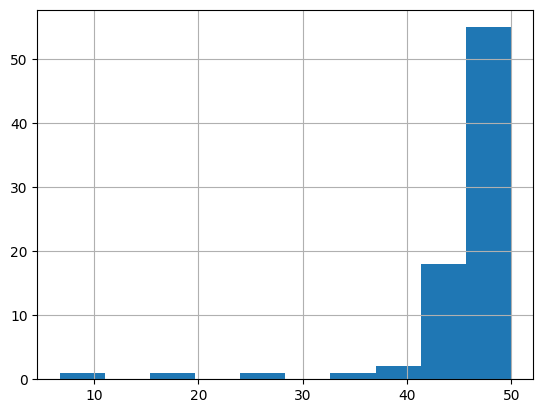

In [33]:
life_under_50 = happy_data[happy_data['Healthy Life Expectancy At Birth']< 50]
life_under_50['Healthy Life Expectancy At Birth'].hist()
plt.show()

In [34]:
#lowest life expectancy number for each country in the under 50 list
life_under_50.groupby('Country Name')['Healthy Life Expectancy At Birth'].min()


Country Name
Botswana                    48.840000
Burkina Faso                49.439999
Burundi                     49.660000
Cameroon                    47.840000
Central African Republic    41.480000
Chad                        47.080002
Congo (Kinshasa)            49.400002
Eswatini                    42.500000
Haiti                        6.720000
Ivory Coast                 48.900002
Lesotho                     41.520000
Malawi                      45.360001
Mali                        49.939999
Mozambique                  44.820000
Sierra Leone                46.279999
Somalia                     47.660000
South Africa                46.000000
Uganda                      48.740002
Zambia                      46.759998
Zimbabwe                    40.400002
Name: Healthy Life Expectancy At Birth, dtype: float64

In [35]:
life_under_50[life_under_50['Country Name']== 'Haiti'].head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
669,Haiti,Latin America and Caribbean,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141,0.357021
670,Haiti,Latin America and Caribbean,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774,0.236633
671,Haiti,Latin America and Caribbean,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557,0.156371
672,Haiti,Latin America and Caribbean,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856,0.456668
673,Haiti,Latin America and Caribbean,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806,0.367327


Haiti is the clear outlier here. It's responsible for all the life expectancy values under 40 in our data set. 
The low values for Haiti seem to be the result of unusual numbers of major disasters in the country. 


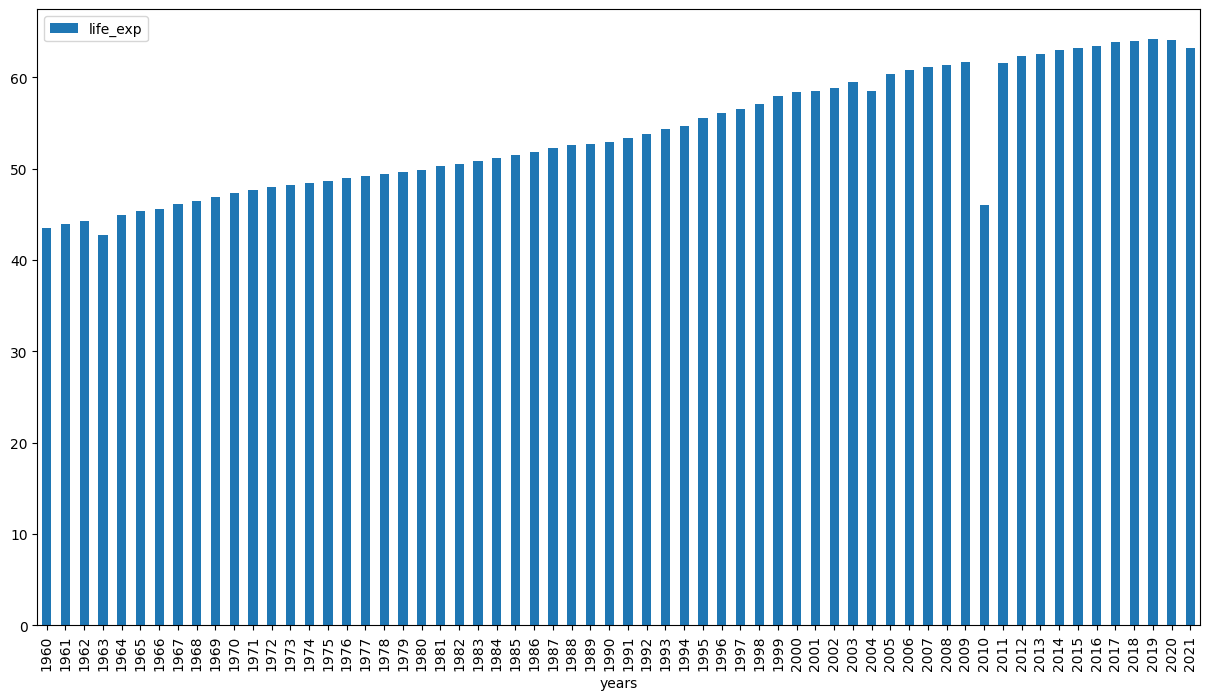

In [36]:
#Cross check the World Bank data with our data from Haiti - has Haiti always had very low life expectancy?

wb_haiti = world_bank_data[world_bank_data['Country Name']== 'Haiti']
wb_haiti.head()

years = wb_haiti.columns[4:-2].tolist()
values = wb_haiti.iloc[0][4:-2].tolist()

year_value_dict = {'years':years, 'life_exp': values}
haiti_df = pd.DataFrame(year_value_dict)

haiti_df.head()

haiti_df.plot.bar(x = 'years', y = 'life_exp', figsize = (15,8))
#figsize = (20,8)
plt.show()


Based on the World Bank Data, Haiti has not always had a low life expectancy. It's lower than first world countries but steadily climbing. It's much higher in the world bank data than our data set. 

The life expectancy given in the World Bank Data for Haiti and the dat given in the happiness report don't seem to match for some of the years. The world bank is reporting significantly higher values for some of the years.
A spot check on other countries revealed that the data is different there as well. This seems to be because the happiness report used WHO data for some, but not all years in their data set. According to the data dictionary, the WHO did not have all years available. 
They then interpolated/ extrapolated to fill in the gaps for years that WHO didn't cover. 

Interestingly, the data in both data sets shows a significant drop in life expectancy in 2010. This is likely due to the excess deaths from the large earthquakes that hit the country that year. 

Given that the life expectancy for Haiti seems to be much higher in the World Bank Data, and to keep the methodology more or less consistent within the happiness report data set. We'll be dropping the haiti rows for 2006, 2008, 2010 and 2011.
These are the lowest years and appear to be significant outliers.  

In [37]:
happy_data[happy_data['Country Name']== 'Haiti'].head(20)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
669,Haiti,Latin America and Caribbean,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141,0.357021
670,Haiti,Latin America and Caribbean,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774,0.236633
671,Haiti,Latin America and Caribbean,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557,0.156371
672,Haiti,Latin America and Caribbean,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856,0.456668
673,Haiti,Latin America and Caribbean,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806,0.367327
674,Haiti,Latin America and Caribbean,2013,4.621962,8.038989,0.648351,43.959999,0.610410,0.246384,0.668976,0.528251,0.326656,0.355143
675,Haiti,Latin America and Caribbean,2014,3.888778,8.041408,0.554149,49.279999,0.508805,0.242564,0.707521,0.573324,0.327208,0.325262
676,Haiti,Latin America and Caribbean,2015,3.569762,8.052312,0.564320,54.599998,0.398295,0.262779,0.777404,0.597597,0.332540,0.297118
677,Haiti,Latin America and Caribbean,2016,3.352300,8.056166,0.583742,54.900002,0.303540,0.247953,0.838523,0.532205,0.367341,0.146065
678,Haiti,Latin America and Caribbean,2017,3.823866,8.067083,0.646985,55.200001,0.484429,0.336749,0.647192,0.570107,0.321693,0.435077


In [38]:
#drop data for Haiti in the years 2006, 2008, 2010, 2011
happy_data.drop(life_under_50[(life_under_50['Country Name']== 'Haiti') & (life_under_50['Year'].isin([2006,2008,2010,2011]))].index, inplace = True)
happy_data.reset_index(drop = True, inplace = True)

happy_data.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [39]:
#Save the happy_data dataframe in the interim data folder


happy_data.to_csv('../data/interim/cleaned_data.csv')
